In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("user_behavior_dataset.csv")

In [4]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.drop("User ID", axis=1, inplace=True)

In [8]:
df.describe()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [9]:
num_cols = df.describe().columns[:-1].tolist()

In [10]:
num_cols

['App Usage Time (min/day)',
 'Screen On Time (hours/day)',
 'Battery Drain (mAh/day)',
 'Number of Apps Installed',
 'Data Usage (MB/day)',
 'Age']

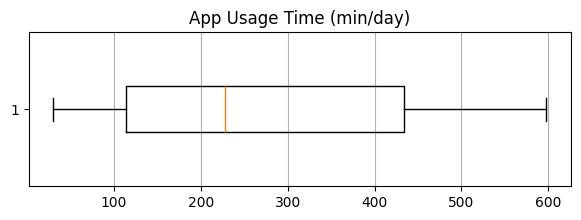

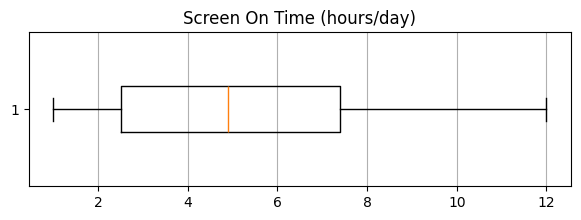

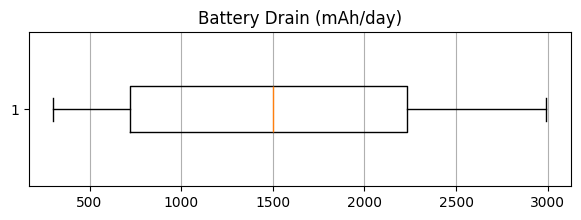

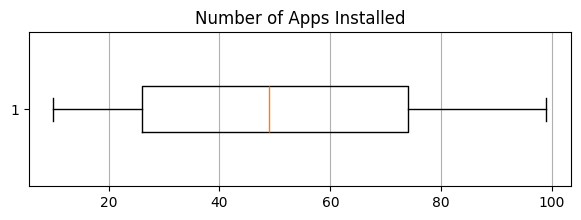

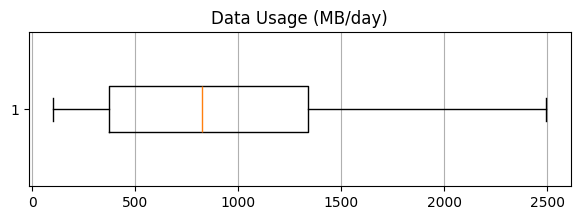

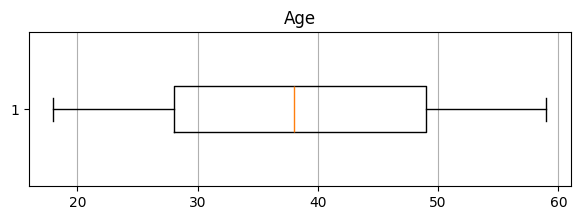

In [11]:
for i in num_cols:
    plt.figure(figsize=(7, 2))
    plt.boxplot(df[i], vert=False, widths=0.3)
    plt.grid(axis="x")
    plt.title(i)
    plt.show()

In [12]:
cat_cols = [x for x in df.columns if x not in num_cols][:-1]

In [13]:
cat_cols

['Device Model', 'Operating System', 'Gender']

In [14]:
for i in cat_cols:
    print(df[i].value_counts())
    print("="*40)

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64
Operating System
Android    554
iOS        146
Name: count, dtype: int64
Gender
Male      364
Female    336
Name: count, dtype: int64


In [42]:
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


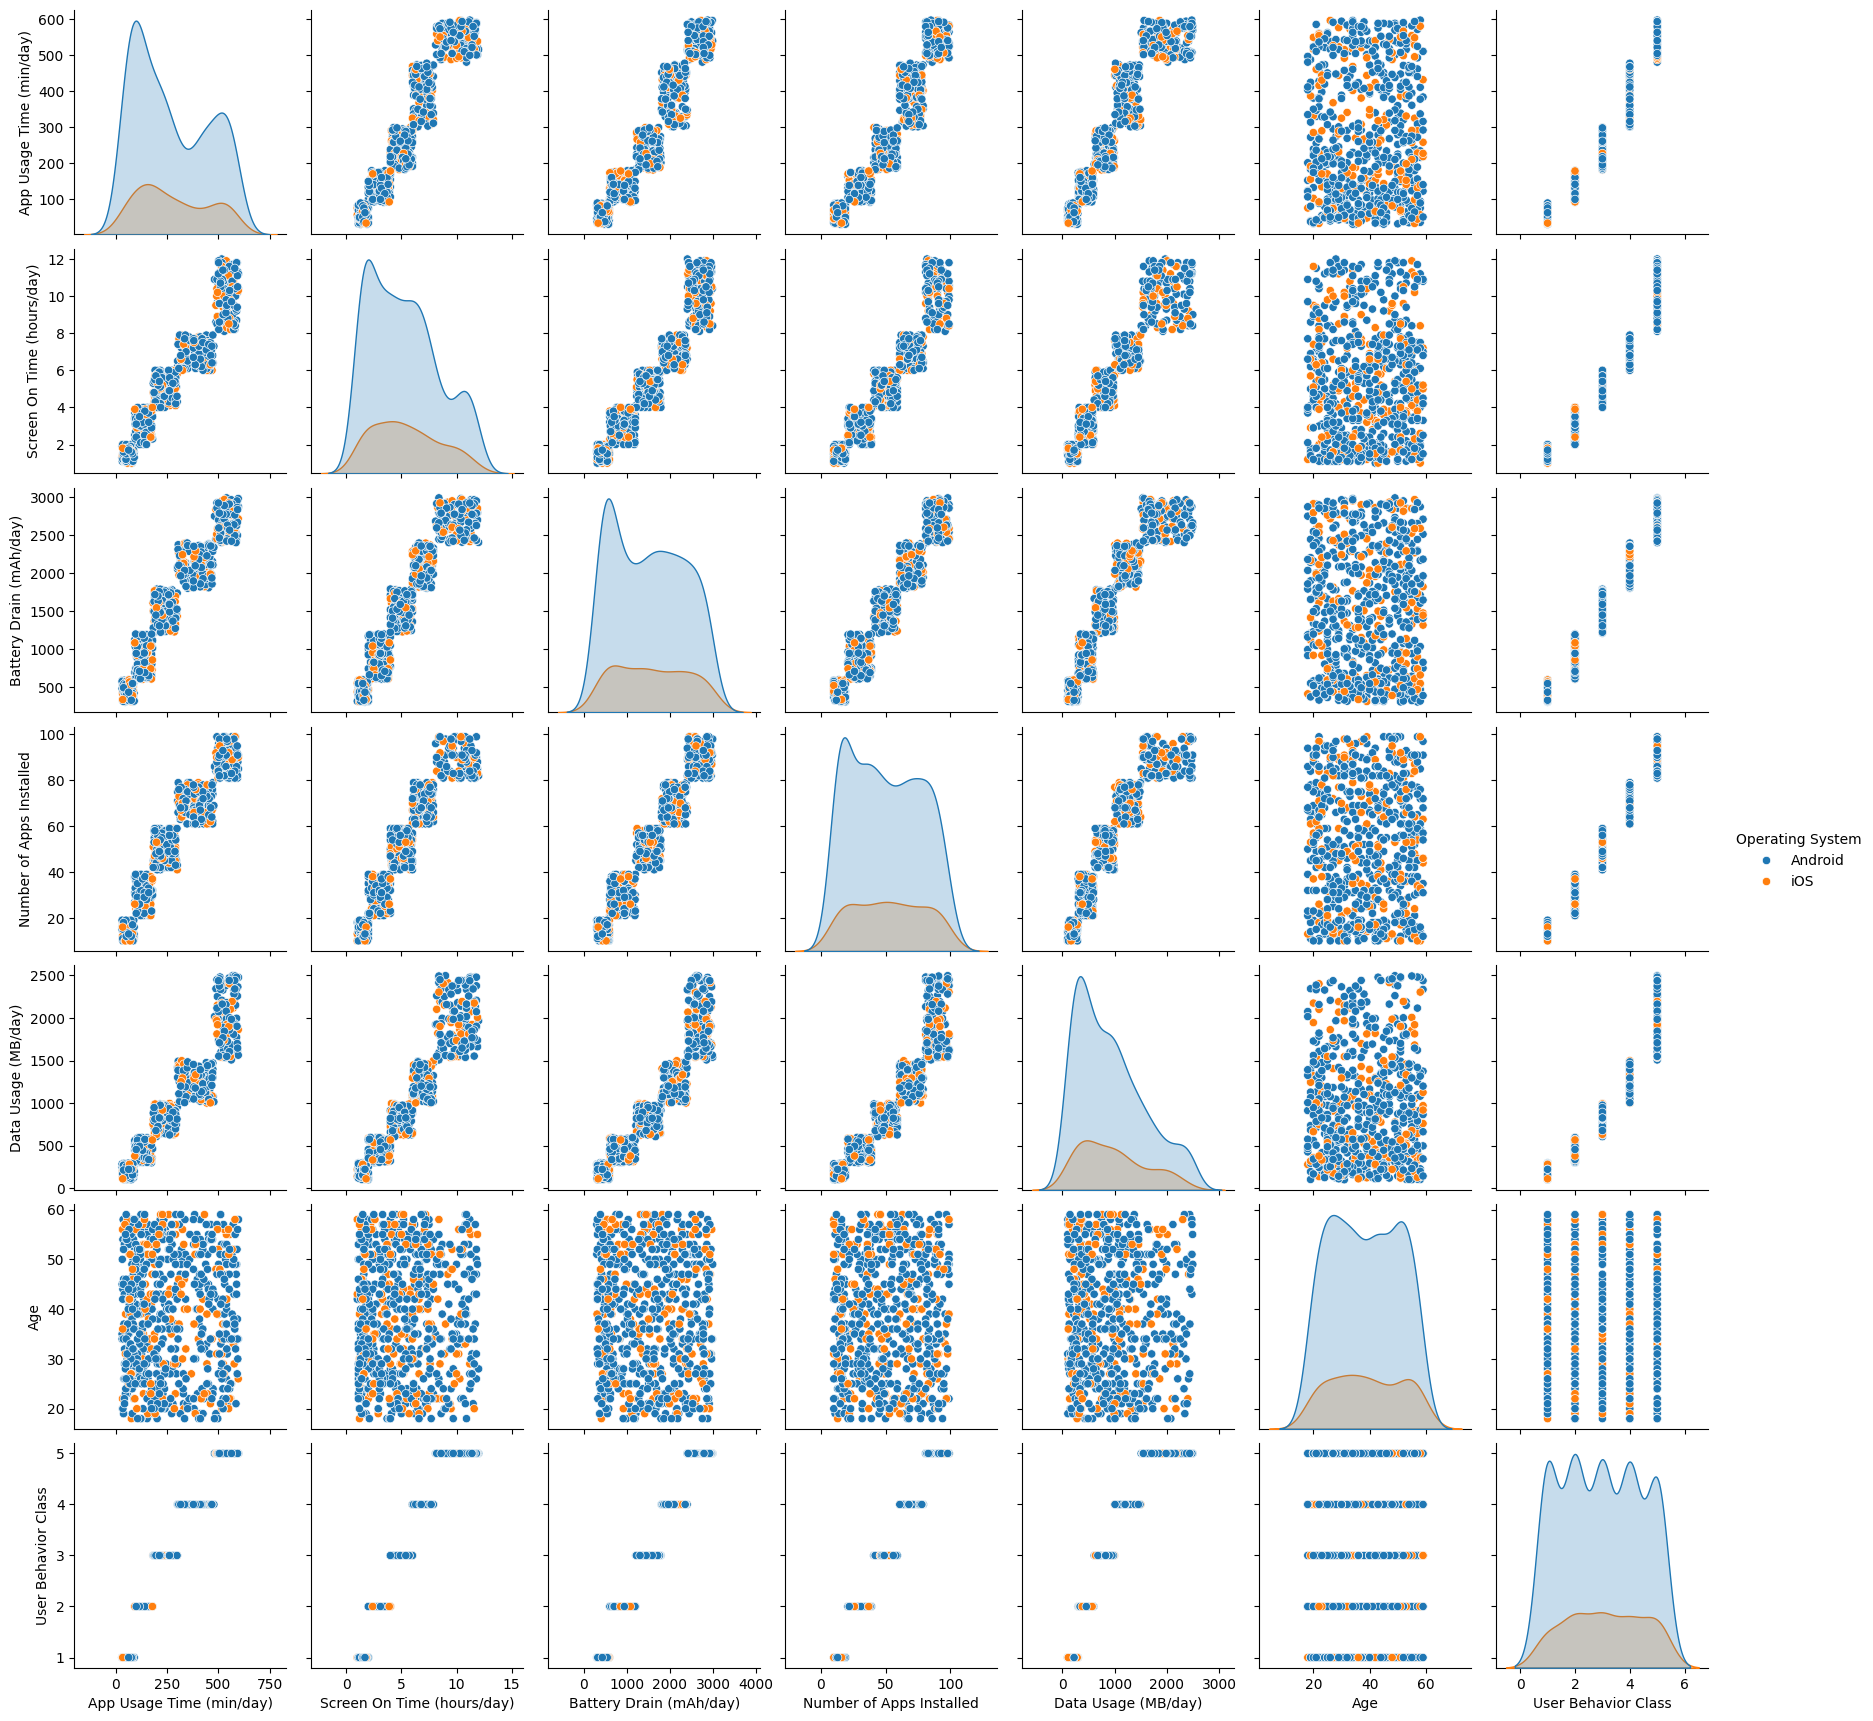

In [44]:
sns.pairplot(df, hue="Operating System")
plt.show()

In [15]:
cat_to_num = pd.get_dummies(df[cat_cols], dtype=np.float64)
cat_to_num

,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_Android,Operating System_iOS,Gender_Female,Gender_Male
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
695,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
696,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
697,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
698,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [16]:
final_df = pd.concat([df, cat_to_num], axis=1).drop(cat_cols, axis=1)

In [17]:
final_df.head()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_Android,Operating System_iOS,Gender_Female,Gender_Male
0,393,6.4,1872,67,1122,40,4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,268,4.7,1331,42,944,47,3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,154,4.0,761,32,322,42,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,239,4.8,1676,56,871,20,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,187,4.3,1367,58,988,31,3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [18]:
final_df.columns

Index(['App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'User Behavior Class',
       'Device Model_Google Pixel 5', 'Device Model_OnePlus 9',
       'Device Model_Samsung Galaxy S21', 'Device Model_Xiaomi Mi 11',
       'Device Model_iPhone 12', 'Operating System_Android',
       'Operating System_iOS', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [19]:
final_df = final_df[['App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age',
       'Device Model_Google Pixel 5', 'Device Model_OnePlus 9',
       'Device Model_Samsung Galaxy S21', 'Device Model_Xiaomi Mi 11',
       'Device Model_iPhone 12', 'Operating System_Android',
       'Operating System_iOS', 'Gender_Female', 'Gender_Male', 'User Behavior Class']]

In [20]:
final_df.head()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_Android,Operating System_iOS,Gender_Female,Gender_Male,User Behavior Class
0,393,6.4,1872,67,1122,40,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4
1,268,4.7,1331,42,944,47,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3
2,154,4.0,761,32,322,42,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2
3,239,4.8,1676,56,871,20,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3
4,187,4.3,1367,58,988,31,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,3


In [21]:
final_df.corr()["User Behavior Class"]

App Usage Time (min/day)           0.970498
Screen On Time (hours/day)         0.964581
Battery Drain (mAh/day)            0.978587
Number of Apps Installed           0.981255
Data Usage (MB/day)                0.946734
Age                               -0.000563
Device Model_Google Pixel 5       -0.026838
Device Model_OnePlus 9            -0.004342
Device Model_Samsung Galaxy S21   -0.004342
Device Model_Xiaomi Mi 11         -0.006377
Device Model_iPhone 12             0.041326
Operating System_Android          -0.041326
Operating System_iOS               0.041326
Gender_Female                      0.000735
Gender_Male                       -0.000735
User Behavior Class                1.000000
Name: User Behavior Class, dtype: float64

In [22]:
X = final_df.drop("User Behavior Class", axis=1)
y = final_df["User Behavior Class"]

In [23]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=32)

In [24]:
scaler = StandardScaler()

In [25]:
X_tr[num_cols] = scaler.fit_transform(X_tr[num_cols])

In [26]:
X_te[num_cols] = scaler.transform(X_te[num_cols])

In [27]:
X_tr.head()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_Android,Operating System_iOS,Gender_Female,Gender_Male
154,-1.147586,-1.241171,-1.425314,-1.519639,-1.309061,-0.624874,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
547,-0.741423,-0.874383,-1.063172,-0.655476,-0.898166,1.640493,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
248,-0.575526,-0.407563,-0.806962,-1.068771,-0.540238,0.969274,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
447,-0.197966,-0.007431,0.102090,0.283832,0.002272,1.640493,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
311,0.414139,0.659455,1.078889,0.659555,0.220559,-0.540971,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [28]:
pca = PCA(n_components=5)

In [29]:
X_tr_extract = pca.fit_transform(X_tr)

In [30]:
X_te_extract = pca.transform(X_te)

In [31]:
X_tr_extract

array([[-2.97148564, -0.67194772, -0.11898254, -0.88617041, -0.47899959],
       [-1.89642575,  1.68447038,  1.50404842, -0.34721976,  0.01561808],
       [-1.54142986,  0.93932152, -0.21017804, -0.90154124, -0.52452158],
       ...,
       [-1.73816013, -0.40519185, -0.13784408, -0.89217446, -0.47960883],
       [-0.27643056, -1.11663859, -0.15168302, -0.79774043,  0.87916339],
       [-0.28210684, -0.55755232, -0.15383987, -0.89066875, -0.48424695]])

In [32]:
X_te_extract

array([[-3.53560209e-01, -9.84683098e-01, -1.23884794e-01,
        -8.97024126e-01, -4.81783532e-01],
       [ 3.58032189e+00, -4.41631139e-01, -5.90662428e-01,
         5.16039764e-01, -1.02404609e-01],
       [-2.23658865e-01,  9.44994570e-01, -1.98171348e-01,
        -8.23910195e-01, -3.17630570e-02],
       [-2.77864758e+00,  6.52663709e-01,  1.16060838e+00,
         1.01474578e+00, -6.02289933e-02],
       [-1.34349326e+00,  8.70421794e-02, -1.67679685e-01,
        -8.55301121e-01, -1.86981121e-01],
       [-6.63639967e-02,  1.27875476e+00, -2.22601482e-01,
        -8.66707314e-01, -2.04011745e-01],
       [-1.45076942e+00,  3.43698387e-01,  1.55534566e+00,
        -3.46467495e-01,  3.91754677e-02],
       [-1.50469418e+00, -1.60084235e+00, -4.82985838e-01,
         5.18038683e-01, -2.23859861e-01],
       [-2.86207005e-01,  3.48386115e-01, -5.78491532e-01,
         4.57369214e-01, -6.03421558e-01],
       [-1.92485839e+00, -7.60910097e-01, -4.87832326e-01,
         5.50221839e-01

In [33]:
X_tr.shape

(525, 15)

In [34]:
X_tr_extract.shape

(525, 5)

In [35]:
X_te_extract.shape

(175, 5)

In [36]:
pca.explained_variance_

array([4.79526111, 1.00329373, 0.57636302, 0.49269057, 0.20417613])

In [37]:
pca.components_

array([[ 4.48299273e-01,  4.47138191e-01,  4.48157841e-01,
         4.48155769e-01,  4.43920122e-01, -1.23017899e-02,
        -4.27084027e-03,  2.60039482e-04,  2.94022605e-04,
        -3.42726978e-03,  7.14404797e-03, -7.14404797e-03,
         7.14404797e-03, -1.80201132e-03,  1.80201132e-03],
       [-1.90225690e-03,  1.50645584e-02, -7.24806503e-03,
         8.66037645e-03,  1.16348439e-02,  9.98296443e-01,
        -1.86263499e-02, -1.66500707e-02,  1.99735538e-02,
        -8.65219710e-03,  2.39550640e-02, -2.39550640e-02,
         2.39550640e-02,  6.75430777e-03, -6.75430777e-03],
       [-1.10229950e-02, -7.40547184e-03,  1.79400736e-03,
         9.94839863e-03, -2.06713978e-02, -4.29185630e-02,
        -1.31779763e-01, -1.10613445e-01, -1.59851031e-01,
        -1.29991241e-01,  5.32235480e-01, -5.32235480e-01,
         5.32235480e-01,  1.94392671e-01, -1.94392671e-01],
       [-2.24204846e-02, -1.17264950e-02, -1.63234046e-03,
         7.99002330e-03,  1.39060008e-02, -3.79763573

In [38]:
models = [LogisticRegression(), 
          DecisionTreeClassifier(max_depth=5), 
          RandomForestClassifier(n_estimators=100, max_depth=5), 
          AdaBoostClassifier(n_estimators=100, estimator=DecisionTreeClassifier()),
          SVC()]

In [39]:
def model_(model, tr_inp, te_inp, tr_out, te_out):
    model.fit(tr_inp, tr_out)
    tr_score = model.score(tr_inp, tr_out)
    pred = model.predict(te_inp)
    te_score = accuracy_score(te_out, pred)
    return f"Training Score : {np.round(tr_score*100, 4)}, Testing score : {np.round(te_score*100, 4)}"

In [40]:
for i in models:
    print("Model :", i)
    print(model_(i, X_tr_extract, X_te_extract, y_tr, y_te))
    print("="*60)

Model : LogisticRegression()
Training Score : 100.0, Testing score : 100.0
Model : DecisionTreeClassifier(max_depth=5)
Training Score : 100.0, Testing score : 100.0
Model : RandomForestClassifier(max_depth=5)
Training Score : 100.0, Testing score : 100.0
Model : AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)
Training Score : 100.0, Testing score : 100.0
Model : SVC()
Training Score : 100.0, Testing score : 100.0


In [41]:
for i in models:
    print("Model :", i)
    print(model_(i, X_tr, X_te, y_tr, y_te))
    print("="*60)

Model : LogisticRegression()
Training Score : 100.0, Testing score : 100.0
Model : DecisionTreeClassifier(max_depth=5)
Training Score : 100.0, Testing score : 100.0
Model : RandomForestClassifier(max_depth=5)
Training Score : 100.0, Testing score : 100.0
Model : AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)
Training Score : 100.0, Testing score : 99.4286
Model : SVC()
Training Score : 100.0, Testing score : 100.0


In [53]:
# Only using these columns :== 'App Usage Time (min/day)', 'Screen On Time (hours/day)',
# 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)'
for i in models:
    print("Model :", i)
    print(model_(i, X_tr.iloc[:, :5], X_te.iloc[:, :5], y_tr, y_te))
    print("="*60)

Model : LogisticRegression()
Training Score : 100.0, Testing score : 100.0
Model : DecisionTreeClassifier(max_depth=5)
Training Score : 100.0, Testing score : 100.0
Model : RandomForestClassifier(max_depth=5)
Training Score : 100.0, Testing score : 100.0
Model : AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)
Training Score : 100.0, Testing score : 100.0
Model : SVC()
Training Score : 100.0, Testing score : 100.0


In [54]:
# Excluding These colums :== 'App Usage Time (min/day)', 'Screen On Time (hours/day)',
# 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)'
for i in models:
    print("Model :", i)
    print(model_(i, X_tr.iloc[:, 5:], X_te.iloc[:, 5:], y_tr, y_te))
    print("="*60)

Model : LogisticRegression()
Training Score : 24.381, Testing score : 22.2857
Model : DecisionTreeClassifier(max_depth=5)
Training Score : 34.4762, Testing score : 18.2857
Model : RandomForestClassifier(max_depth=5)
Training Score : 46.8571, Testing score : 21.7143
Model : AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)
Training Score : 68.381, Testing score : 21.1429
Model : SVC()
Training Score : 31.4286, Testing score : 20.5714
